---Shape---
(1000, 26)
---Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player_ID                 1000 non-null   int64  
 1   Player_Name               901 non-null    object 
 2   Age                       909 non-null    float64
 3   Nationality               885 non-null    object 
 4   Position                  890 non-null    object 
 5   Current_Club              901 non-null    object 
 6   League                    903 non-null    object 
 7   Appearances               912 non-null    float64
 8   Goals                     898 non-null    float64
 9   Market_Value_Million_EUR  882 non-null    float64
 10  Transfer_Fee_Million_EUR  895 non-null    float64
 11  Shots_Per_Game            909 non-null    float64
 12  Dribbles_Per_Game         906 non-null    float64
 13  Key_Passes_Per_Game       905

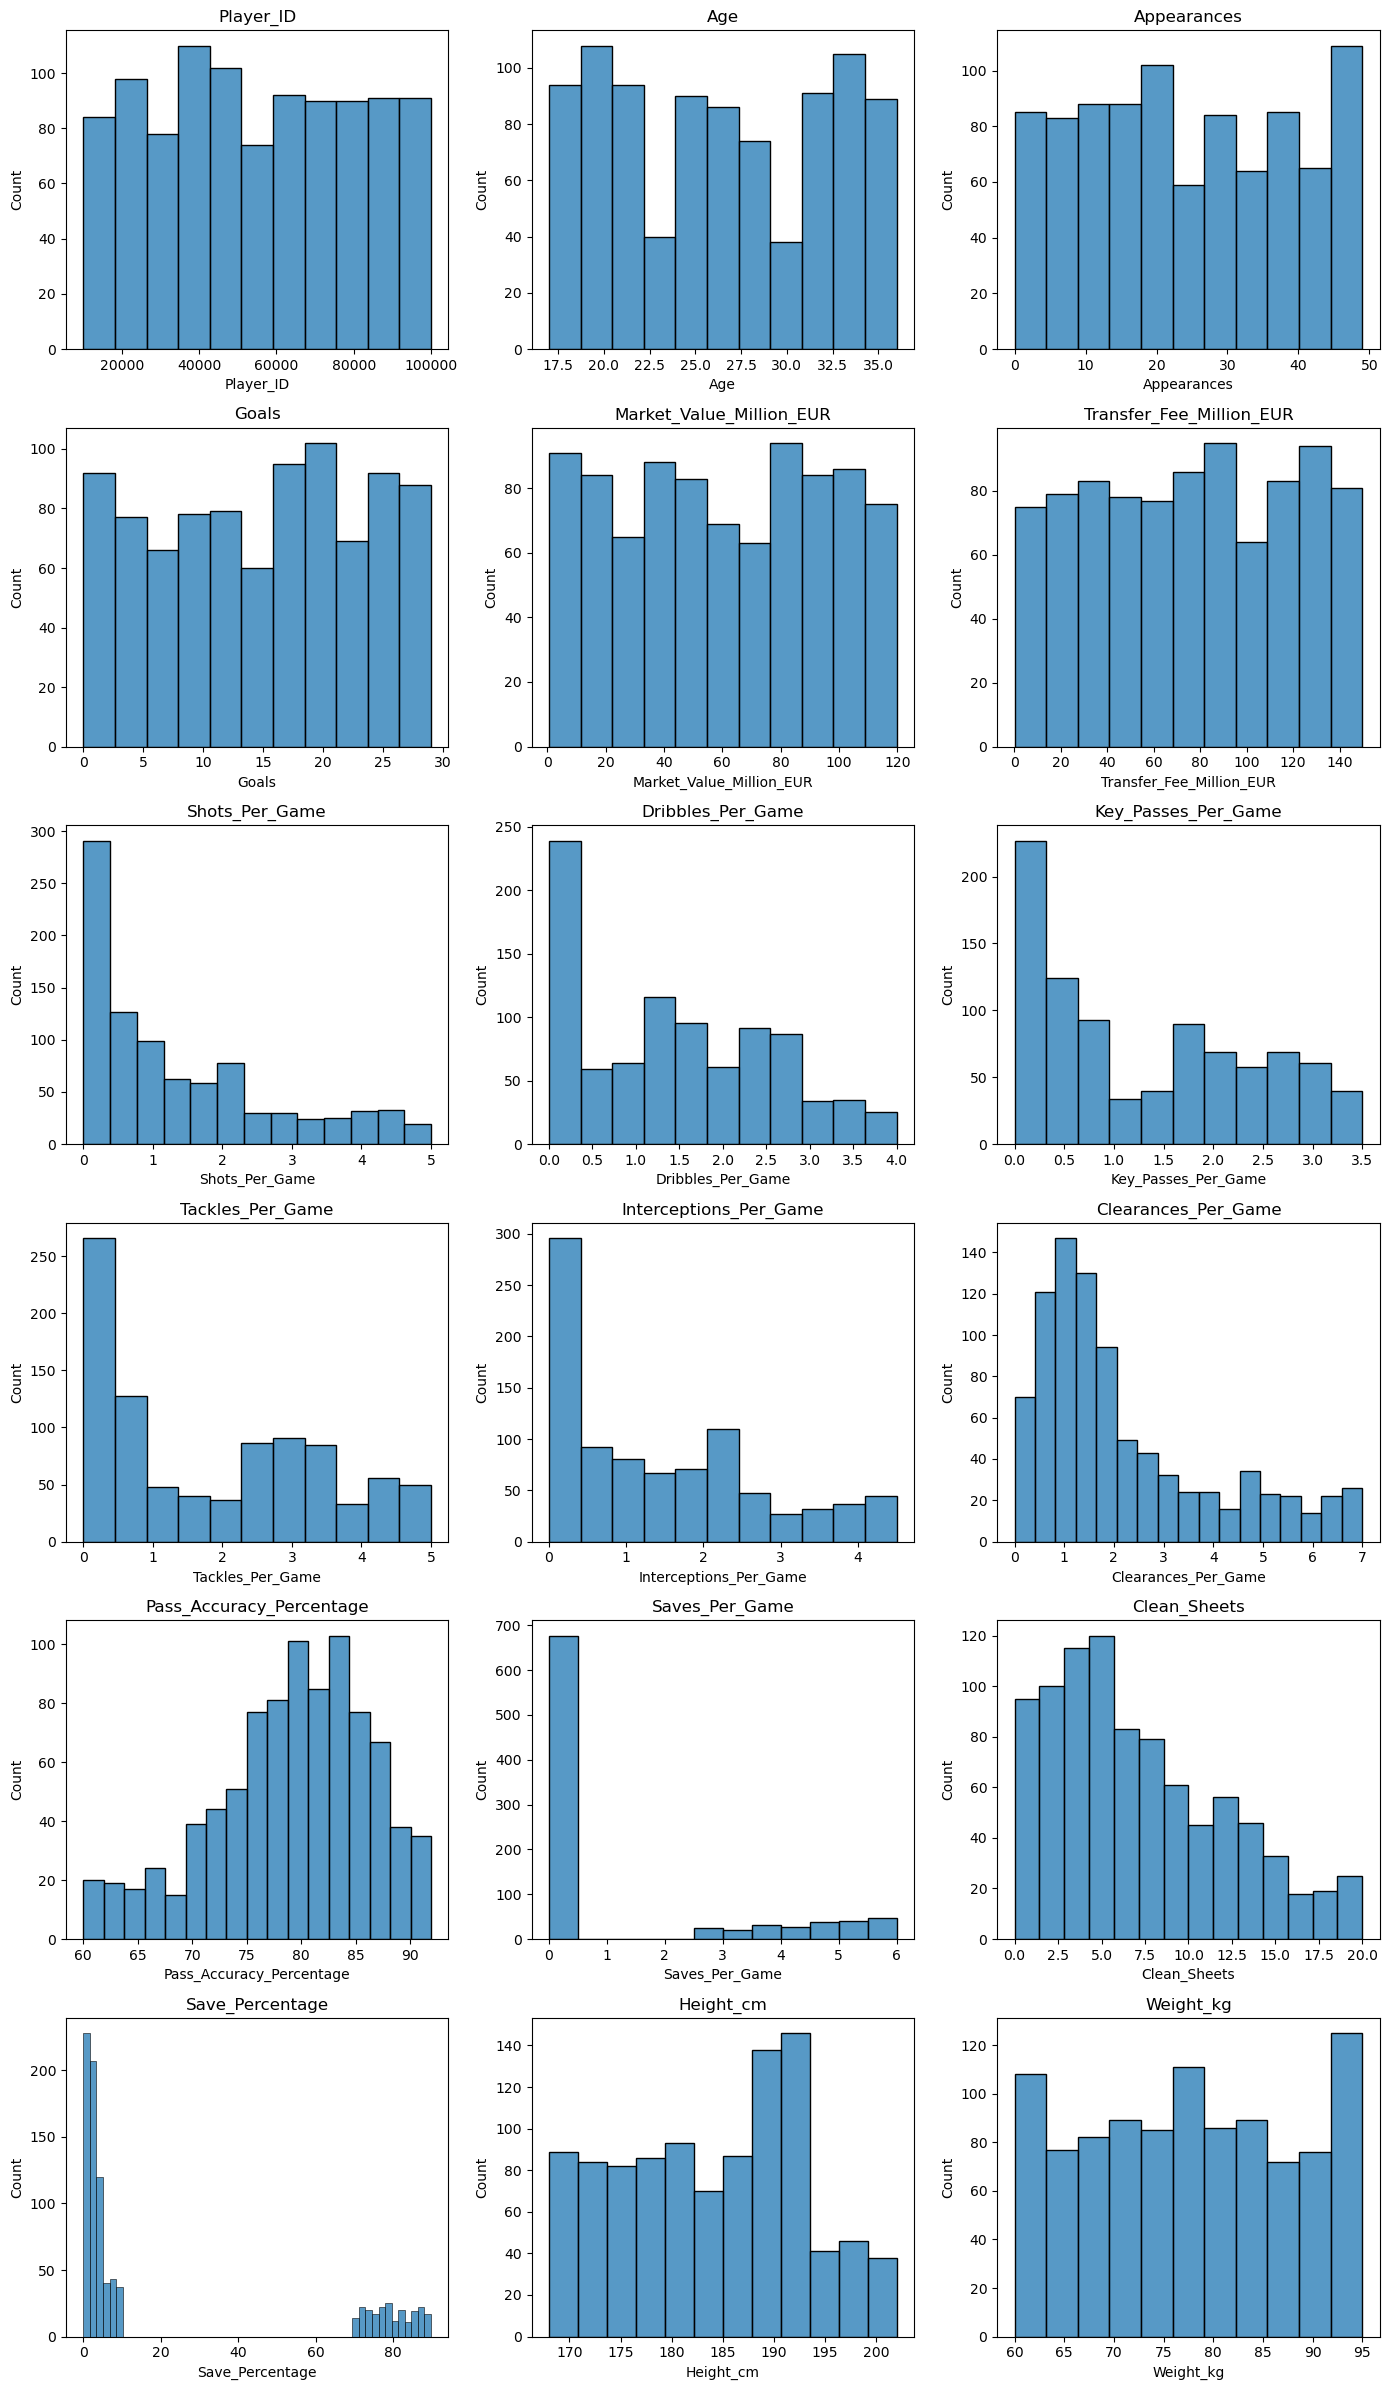

[I 2025-08-15 19:34:47,334] A new study created in memory with name: no-name-217e0123-fe0b-4ed1-879a-a48f97b030b6


  0%|          | 0/1 [00:00<?, ?it/s]

[0]	validation_0-rmsle:1.07823
[100]	validation_0-rmsle:0.11733
[200]	validation_0-rmsle:0.11574
[300]	validation_0-rmsle:0.11568
[400]	validation_0-rmsle:0.11567
[477]	validation_0-rmsle:0.11568
[0]	validation_0-rmsle:1.08246
[100]	validation_0-rmsle:0.08024
[200]	validation_0-rmsle:0.07402
[300]	validation_0-rmsle:0.07347
[400]	validation_0-rmsle:0.07320
[500]	validation_0-rmsle:0.07305
[600]	validation_0-rmsle:0.07173
[700]	validation_0-rmsle:0.07150
[800]	validation_0-rmsle:0.07137
[900]	validation_0-rmsle:0.07009
[1000]	validation_0-rmsle:0.07003
[1021]	validation_0-rmsle:0.07003
[0]	validation_0-rmsle:1.07655
[100]	validation_0-rmsle:0.09959
[200]	validation_0-rmsle:0.09696
[300]	validation_0-rmsle:0.09682
[400]	validation_0-rmsle:0.09674
[500]	validation_0-rmsle:0.09671
[600]	validation_0-rmsle:0.09669
[700]	validation_0-rmsle:0.09669
[800]	validation_0-rmsle:0.09668
[900]	validation_0-rmsle:0.09667
[1000]	validation_0-rmsle:0.09667
[1100]	validation_0-rmsle:0.09667
[1200]	valid

[I 2025-08-15 19:34:51,093] A new study created in memory with name: no-name-8d4c3c77-3624-4436-b704-f90d51f481f9


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2025-08-15 19:34:53,875] Trial 0 finished with value: 0.17925232465532218 and parameters: {'num_leaves': 52, 'colsample_bytree': 0.7835108155281388, 'reg_alpha': 0.4245175907491331, 'reg_lambda': 8.447761323199037, 'max_depth': 3, 'learning_rate': 0.0001750403776179906, 'n_estimators': 2045, 'min_child_samples': 84, 'subsample': 0.4820239538109718}. Best is trial 0 with value: 0.17925232465532218.
예측 결과 [56.65150484 37.77924324 35.98047053 56.65150484 49.30260802 56.65150484
 56.65150484 53.31464077 56.65150484 56.65150484 56.65150484 26.96994798
 43.40690859 46.06536279 53.38877859 56.65150484 53.84083435 50.65269386
 56.65150484 56.6493338  56.65150484 53.31464077 26.96994798 46.06536279
 27.00934242 35.889881   56.65150484 55.74412981 53.15478652 56.65150484
 38.6161859  56.65150484 56.65150484 56.65150484 56.65150484 26.96994798
 56.65150484 43.40690859 53.91177511 56.65150484 34.59485253 27.20161121
 46.06536279 36.88800417 56.65150484 27.39236788 56.65150484 53.89169265
 56.65

In [ ]:
## TODO : 모듈로 합치기 

import pandas as pd
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from career_class import CareerPreprocessor
from injury_class import InjuryPreprocessor
from contract_preprocess import ContractDateProcessor
from onehot_encoder import OneHotEncoding
from predict import Predict_Xgb
from visualization.visualization_class import Visualization


# 깔끔한 출력을 위함 
import warnings

warnings.filterwarnings("ignore")



def run_pipeline(train_path, career_path, injury_path, test_path , career_test_path, injury_test_path):
    
    # 학습 데이터 주소 설정 
    train = pd.read_csv(train_path)
    train.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
    
    # 평가 데이터 주소 설정 
    test = pd.read_csv(test_path)
    test.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

    Visualization(train,test).process()

    # 훈련 데이터 전처리 
    train = ContractDateProcessor(train).process()
    train = CareerPreprocessor(train, career_path).process()
    train = InjuryPreprocessor(train, injury_path).process()
    
    # 평가 데이터 전처리 
    test = ContractDateProcessor(test).process()
    test = CareerPreprocessor(test, career_test_path).process()
    test = InjuryPreprocessor(test, injury_test_path).process()

    # 원 핫 인코딩 적용 
    oh_x, oh_y, oh_test = OneHotEncoding(train,test).run()

    # 최종 예측
    Predict_Xgb(oh_x, oh_y, oh_test).XGB_LGB_PREDICT(
    xgb_weight=0.1,
    lgb_weight=0.9
    )


if __name__ == "__main__":

    # 훈련 데이터 주소 설정 
    train_path = "C:/Users/82103/Desktop/soccer market project/soccer market project/Temp folder/football_market_sample.csv"
    career_path = "C:/Users/82103/Desktop/soccer market project/soccer market project/Temp folder/career_sample.csv"
    injury_path = "C:/Users/82103/Desktop/soccer market project/soccer market project/Temp folder/player_injury_sample.csv"
    
    # 평가 데이터 주소 설정 
    test_path = "C:/Users/82103/Desktop/soccer market project/soccer market project/Temp folder/test_sample.csv"
    career_test_path = "C:/Users/82103/Desktop/soccer market project/soccer market project/Temp folder/career_test_sample.csv"
    injury_test_path = "C:/Users/82103/Desktop/soccer market project/soccer market project/Temp folder/injury_test_sample.csv"
    
   
    run_pipeline(train_path, career_path, injury_path, test_path , career_test_path, injury_test_path)
    

 